In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [8]:
df=pd.read_csv(r"C:\Users\Pranav\Python_new\data\Ames_Housing_Data.tsv",sep='\t')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<Axes: >

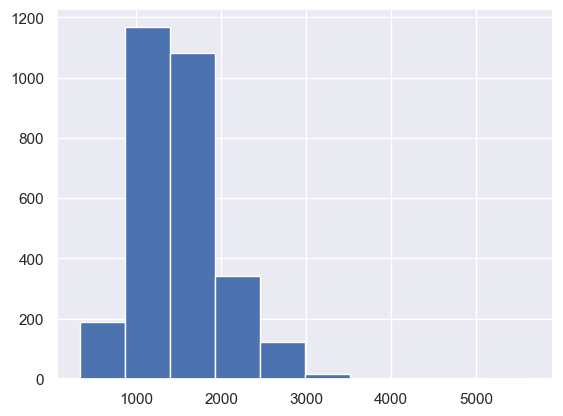

In [9]:
df['Gr Liv Area'].hist()

In [10]:
df=df.loc[df['Gr Liv Area']<=4000,:]
print(df.shape[0])
data=df.copy()


2925


In [12]:
df.drop(['PID','Order'],axis=1,inplace=True)
df.shape[1]

80

In [13]:
num_cols=df.select_dtypes('number').columns
skew_limit=0.75
skew_vals=df[num_cols].skew()

In [14]:
skew_vals

MS SubClass         1.356549
Lot Frontage        1.111071
Lot Area           13.200004
Overall Qual        0.171657
Overall Cond        0.572769
Year Built         -0.602475
Year Remod/Add     -0.449567
Mas Vnr Area        2.565458
BsmtFin SF 1        0.821985
BsmtFin SF 2        4.135900
Bsmt Unf SF         0.925021
Total Bsmt SF       0.399079
1st Flr SF          0.942615
2nd Flr SF          0.847517
Low Qual Fin SF    12.107629
Gr Liv Area         0.878879
Bsmt Full Bath      0.615553
Bsmt Half Bath      3.965970
Full Bath           0.164954
Half Bath           0.702966
Bedroom AbvGr       0.306912
Kitchen AbvGr       4.309573
TotRms AbvGrd       0.704992
Fireplaces          0.732312
Garage Yr Blt      -0.382039
Garage Cars        -0.219734
Garage Area         0.213681
Wood Deck SF        1.848286
Open Porch SF       2.495162
Enclosed Porch      4.010586
3Ssn Porch         11.393854
Screen Porch        3.953495
Pool Area          18.743766
Misc Val           22.225015
Mo Sold       

In [15]:
skew_cols=skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending=False)
skew_cols

Misc Val           22.225015
Pool Area          18.743766
Lot Area           13.200004
Low Qual Fin SF    12.107629
3Ssn Porch         11.393854
Kitchen AbvGr       4.309573
BsmtFin SF 2        4.135900
Enclosed Porch      4.010586
Bsmt Half Bath      3.965970
Screen Porch        3.953495
Mas Vnr Area        2.565458
Open Porch SF       2.495162
Wood Deck SF        1.848286
SalePrice           1.591072
MS SubClass         1.356549
Lot Frontage        1.111071
1st Flr SF          0.942615
Bsmt Unf SF         0.925021
Gr Liv Area         0.878879
2nd Flr SF          0.847517
BsmtFin SF 1        0.821985
dtype: float64

In [16]:
for col in skew_cols.index.values:
    df[col]=df[col].apply(np.log1p)

In [17]:
smaller_df=df.loc[:,['Lot Area','Overall Qual','Overall Cond','Year Built','Year Remod/Add','Gr Liv Area','Full Bath','Bedroom AbvGr','Fireplaces','Garage Cars','SalePrice']]


In [18]:
smaller_df.describe()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.000000,2925.000000
mean,9.090148,6.088205,5.563761,1971.302906,1984.234188,7.258784,1.564786,2.853675,0.596923,1.765048,12.019887
std,0.508309,1.402953,1.112262,30.242474,20.861774,0.320753,0.551386,0.827737,0.645349,0.759834,0.406013
min,7.170888,1.000000,1.000000,1872.000000,1950.000000,5.814131,0.000000,0.000000,0.000000,0.000000,9.456419
25%,8.914492,5.000000,5.000000,1954.000000,1965.000000,7.027315,1.000000,2.000000,0.000000,1.000000,11.771444
50%,9.151545,6.000000,5.000000,1973.000000,1993.000000,7.273786,2.000000,3.000000,1.000000,2.000000,11.982935
75%,9.351493,7.000000,6.000000,2001.000000,2004.000000,7.462215,2.000000,3.000000,1.000000,2.000000,12.271397
max,12.279537,10.000000,9.000000,2010.000000,2010.000000,8.248267,4.000000,8.000000,4.000000,5.000000,13.345509


In [19]:
smaller_df=smaller_df.fillna(0)
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2925 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 274.2 KB


In [22]:
X=smaller_df.loc[:,['Lot Area','Overall Qual','Overall Cond','Year Built','Year Remod/Add','Gr Liv Area','Full Bath','Bedroom AbvGr','Fireplaces','Garage Cars']]

y=smaller_df['SalePrice']
y.info()

<class 'pandas.core.series.Series'>
Index: 2925 entries, 0 to 2929
Series name: SalePrice
Non-Null Count  Dtype  
--------------  -----  
2925 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 251.4 KB


In [24]:
X2=X.copy()

X2['OQ2']=X2['Overall Qual']**2

X2['GLA2']=X2['Gr Liv Area']**2

In [25]:
X3=X2.copy()

X3['OQ_X_YB']=X3['Overall Qual']*X3['Year Built']

X3['OQ_/_LA']=X3['Overall Qual']/X3['Lot Area']


In [27]:
nbh_counts=df.Neighborhood.value_counts()
nbh_counts

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

In [28]:
other_nbhs=list(nbh_counts[nbh_counts<=8].index)
other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [29]:
X4=X3.copy()
X4['Neighborhood']=df['Neighborhood'].replace(other_nbhs,'Other')

In [30]:
def add_deviation_feature(X,feature,category):
    category_gb=X.groupby(category)[feature]

    category_mean=category_gb.transform(lambda x:x.mean())
    category_std=category_gb.transform(lambda x:x.std())

    deviation_feature=(X[feature]-category_mean)/category_std
    X[feature+'_Dev_'+category]=deviation_feature


In [31]:
X5=X4.copy()
X5['House Style']=df['House Style']
add_deviation_feature(X5,'Year Built','House Style')
add_deviation_feature(X5,'Overall Qual','Neighborhood')

In [32]:
X5

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,OQ2,GLA2,OQ_X_YB,OQ_/_LA,Neighborhood,House Style,Year Built_Dev_House Style,Overall Qual_Dev_Neighborhood
0,10.366309,6,5,1960,1960,7.412764,1,3,2,2.0,36,54.949070,11760,0.578798,NAmes,1Story,-0.590334,0.857503
1,9.360741,5,6,1961,1961,6.799056,1,2,0,1.0,25,46.227161,9805,0.534146,NAmes,1Story,-0.551186,-0.430205
2,9.565775,6,6,1958,1958,7.192934,1,3,0,1.0,36,51.738303,11748,0.627236,NAmes,1Story,-0.668629,0.857503
3,9.320181,7,5,1968,1968,7.654917,2,3,2,2.0,49,58.597755,13776,0.751058,NAmes,1Story,-0.277154,2.145211
4,9.534668,5,5,1997,1998,7.396335,2,3,1,2.0,25,54.705776,9985,0.524402,Gilbert,2Story,0.545208,-2.101974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,8.979417,6,6,1984,1984,6.911747,1,3,0,2.0,36,47.772251,11904,0.668195,Mitchel,SLvl,0.505068,0.434947
2926,9.092232,5,5,1983,1983,6.805723,1,2,0,2.0,25,46.317859,9915,0.549920,Mitchel,1Story,0.310059,-0.518590
2927,9.253591,5,5,1992,1992,6.878326,1,3,0,0.0,25,47.311375,9960,0.540331,Mitchel,SFoyer,1.096487,-0.518590
2928,9.211440,5,5,1974,1975,7.237059,1,2,1,2.0,25,52.375023,9870,0.542803,Mitchel,1Story,-0.042269,-0.518590
